In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in dataframe
df = pd.read_csv('reel_events_rows-2.csv')

# Drop all rows with NaN in 'dwell_seconds' column (157)
df.dropna(subset='dwell_seconds', inplace=True)

# For all duplicated 'user_id'-'song_id' duplicates, combine and take the mean for 'dwell_seconds'
df = df.groupby(['user_id', 'song_id'], as_index=False).agg({'dwell_seconds': 'mean'})

In [ ]:
# Create lists of unique songs and users
all_songs = list(df['song_id'].unique())
all_users = list(df['user_id'].unique())

# Create functions to create new columns in df
def get_song_idx(song_id):
    return int(all_songs.index(song_id))

def get_user_idx(user_id):
    return int(all_users.index(user_id))

# Create new columns in df -- index of song and user in that column
df['user_idx'] = df['user_id'].apply(get_user_idx)
df['song_idx'] = df['song_id'].apply(get_song_idx)

In [56]:
# Create a matrix A where the [i, j] entry is the dwell_seconds of song i and user j
A = np.zeros((len(all_songs), len(all_users)))
for row in range(len(df)):
    i, j = int(df.loc[row, 'song_idx']), int(df.loc[row, 'user_idx'])
    A[i, j] = df.loc[row, 'dwell_seconds']

A = np.tanh(A)

In [ ]:
# Get the mean nonzero entry
mask = A != 0
A[mask].mean()

np.float64(0.8472052680061183)

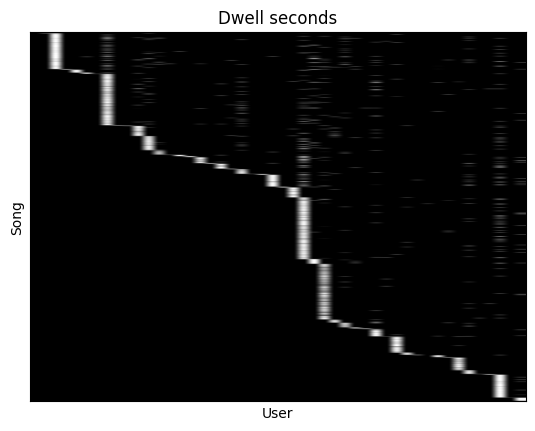

In [57]:
# Plot the resulting matrix
plt.imshow(A, cmap='gray', aspect='auto', vmin=0, vmax=A.max())
plt.xticks([])
plt.yticks([])
plt.title('Dwell seconds')
plt.xlabel('User')
plt.ylabel("Song")
plt.show()
